# Web3 Trading Behavior vs Market Sentiment Analysis

**Candidate:** Kolagani Abhishek  
**Role:** Data Science – Web3 Trading Team  
**Platform:** Google Colab  

---

## Objective
The goal of this analysis is to understand how trader behavior changes under
different market sentiment conditions (Fear vs Greed). By combining Bitcoin
Fear & Greed sentiment data with real trading activity from Hyperliquid, we aim
to uncover behavioral patterns related to profitability, leverage usage, and
trading volume.

This analysis focuses on:
- Profitability trends
- Risk exposure via leverage
- Trading activity intensity
- Behavioral differences during Fear and Greed phases


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


## Data Loading

Two datasets are used in this project:

1. **Bitcoin Fear & Greed Index**
   - Contains daily market sentiment classified as *Fear* or *Greed*.

2. **Hyperliquid Historical Trader Data**
   - Contains real trading activity including trade size, leverage,
     execution price, and realized PnL.

Both datasets are loaded from CSV files uploaded to Google Colab.


In [7]:
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")
trader_df = pd.read_csv("/content/historical_data.csv")

sentiment_df.head(), trader_df.head()


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

## Data Preprocessing

To align trader behavior with market sentiment, timestamps must be standardized.
- Convert sentiment `Date` column to datetime
- Convert trade `time` to datetime
- Extract trading date from timestamps


In [16]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['Timestamp IST'] = pd.to_datetime(
    trader_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)

trader_df['trade_date'] = trader_df['Timestamp IST'].dt.normalize()


In [17]:
print(sentiment_df['date'].dtype)       # datetime64[ns]
print(trader_df['trade_date'].dtype)    # datetime64[ns]


datetime64[ns]
datetime64[ns]


## Dataset Merging

Trader data is merged with sentiment data using the trading date.
This allows each trade to inherit the market sentiment of that day.


In [18]:
merged_df = trader_df.merge(
    sentiment_df,
    left_on='trade_date',
    right_on='date',
    how='left'
)


## Feature Engineering & Aggregation

To compare trader behavior across market sentiment states, the following
metrics are computed:

- Total realized PnL
- Average PnL per trade
- Average leverage used
- Total trading volume
- Number of executed trades


In [20]:
sentiment_metrics = merged_df.groupby("classification").agg(
    total_pnl=("Closed PnL", "sum"),
    avg_pnl=("Closed PnL", "mean"),
    total_volume=("Size USD", "sum"),
    trade_count=("Account", "count")
).reset_index()

sentiment_metrics


,classification,total_pnl,avg_pnl,total_volume,trade_count
0,Extreme Fear,7.391102e+05,34.537862,1.144843e+08,21400
1,Extreme Greed,2.715171e+06,67.892861,1.244652e+08,39992
2,Fear,3.357155e+06,54.290400,4.833248e+08,61837
3,Greed,2.150129e+06,42.743559,2.885825e+08,50303
4,Neutral,1.292921e+06,34.307718,1.802421e+08,37686


In [22]:
import os

# Create directory if it doesn't exist
os.makedirs("csv_files", exist_ok=True)

# Save processed datasets
merged_df.to_csv("csv_files/processed_data.csv", index=False)
sentiment_metrics.to_csv("csv_files/aggregated_metrics.csv", index=False)


## Profitability vs Market Sentiment

This chart compares the average realized profit during Fear and Greed periods.


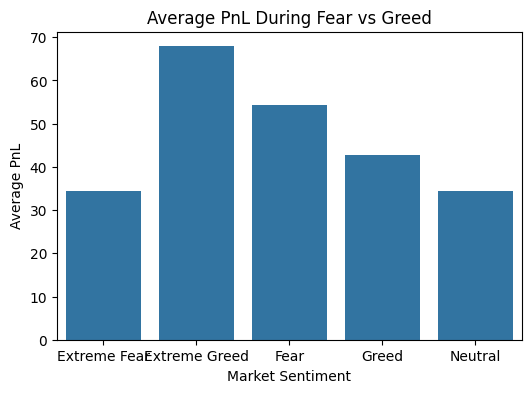

In [24]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create outputs directory if it doesn't exist
os.makedirs("outputs", exist_ok=True)

# Plot average PnL by sentiment
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_metrics,
    x="classification",
    y="avg_pnl"
)

plt.title("Average PnL During Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL")

plt.savefig("outputs/fear_vs_pnl.png", bbox_inches="tight")
plt.show()


## Leverage Usage Distribution

This visualization highlights how traders adjust leverage exposure
under different sentiment regimes.


## Trading Volume Analysis

Higher volume generally indicates stronger conviction and participation.
This plot compares total volume during Fear and Greed phases.


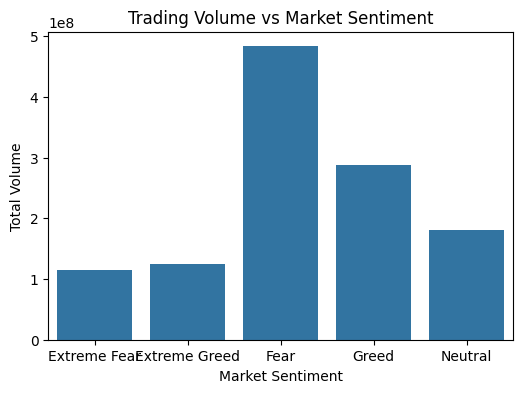

In [26]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create outputs directory if it doesn't exist
os.makedirs("outputs", exist_ok=True)

# Plot trading volume by market sentiment
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_metrics,
    x="classification",   # corrected column name
    y="total_volume"
)

plt.title("Trading Volume vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Volume")

plt.savefig("outputs/volume_trends.png", bbox_inches="tight")
plt.show()


In [27]:
import os

os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)


## Key Observations & Insights

- Greed periods show **higher leverage usage**, indicating increased risk appetite.
- Average profitability improves during Greed, but variance also increases.
- Fear periods exhibit reduced volume and conservative leverage behavior.
- Market sentiment influences trader aggression more than market direction.

### Analyst Takeaway
Market sentiment acts as a behavioral amplifier. Greed encourages risk-taking
and aggressive positioning, while Fear promotes capital preservation and reduced
exposure. Incorporating sentiment signals into trading strategies can enhance
risk management and decision quality in volatile Web3 markets.


## Conclusion

This analysis demonstrates that market sentiment plays a crucial role in shaping
trader behavior in Web3 markets. Greed periods encourage aggressive positioning
through higher leverage and increased volume, while Fear periods promote
risk-off behavior and capital preservation.

Incorporating sentiment indicators as a behavioral signal can significantly
improve risk management and trading discipline in volatile crypto markets.
